C:\Users\OBINNA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.5047 - loss: 1.0231 - val_accuracy: 0.7273 - val_loss: 0.7715
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5515 - loss: 0.9374 - val_accuracy: 0.7273 - val_loss: 0.6598
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5460 - loss: 0.8625 - val_accuracy: 0.7273 - val_loss: 0.5856
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5876 - loss: 0.8346 - val_accuracy: 0.6818 - val_loss: 0.5323
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5109 - loss: 0.8209 - val_accuracy: 0.6818 - val_loss: 0.4897
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6833 - loss: 0.7478 - val_accuracy: 0.7727 - val_loss: 0.4564
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7430 - loss: 0.7061 - val_accuracy: 0.8182 - val_loss: 0.4297
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7679 - loss: 0.6642 - val_accuracy: 0.8182 - val_loss

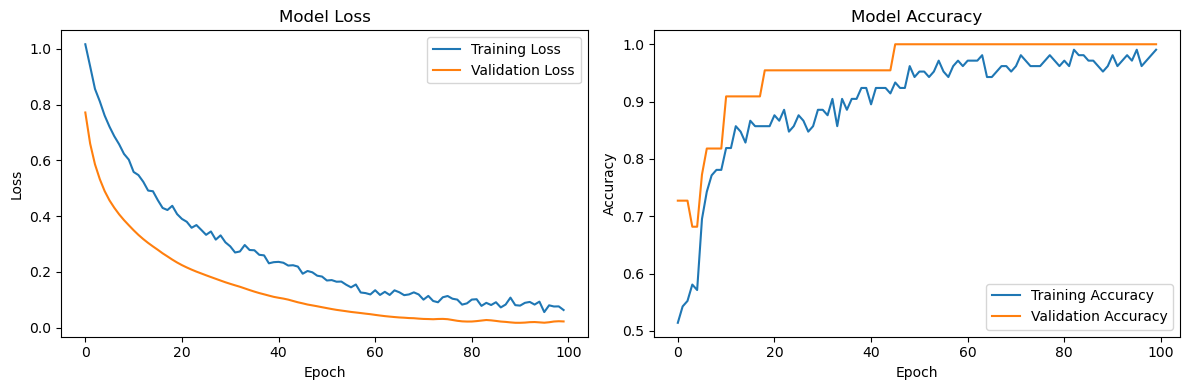


Model saved as 'iris_model.h5'
Model loaded successfully


In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load and preprocess the Iris dataset
# The Iris dataset has 4 features (sepal length, sepal width, petal length, petal width)
# and 3 classes (Setosa, Versicolor, Virginica)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (0, 1, 2 for the three classes)

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (mean=0, std=1) for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding for multi-class classification
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# 2. Build the neural network model using Keras Sequential API
model = tf.keras.Sequential([
    # Input layer: Dense layer with 64 units, ReLU activation
    # Input shape is (4,) since we have 4 features
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    # Hidden layer: Another dense layer with 32 units, ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),
    # Add dropout to prevent overfitting (drops 20% of units randomly during training)
    tf.keras.layers.Dropout(0.2),
    # Output layer: 3 units (one per class) with softmax activation for probabilities
    tf.keras.layers.Dense(3, activation='softmax')
])

# 3. Compile the model
# - Optimizer: Adam with default learning rate (0.001)
# - Loss: Categorical crossentropy for multi-class classification
# - Metrics: Track accuracy during training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Define callbacks for training
# EarlyStopping: Stop training if validation loss doesn't improve for 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# TensorBoard: Visualize training metrics (optional, requires tensorboard)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs')

# 5. Train the model
# - Epochs: 100 (maximum iterations over the dataset)
# - Batch size: 32 (number of samples per gradient update)
# - Validation data: Monitor performance on validation set
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, tensorboard],
                    verbose=1)

# 6. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 7. Make predictions on a few test samples
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:5], axis=1)
print("\nSample Predictions:")
for i, (pred, actual) in enumerate(zip(predicted_classes, actual_classes)):
    print(f"Sample {i+1}: Predicted class = {iris.target_names[pred]}, Actual class = {iris.target_names[actual]}")

# 8. Visualize training history (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Save the model for future use
model.save('iris_model.h5')
print("\nModel saved as 'iris_model.h5'")

# 10. Load the model (example of reusing the model)
loaded_model = tf.keras.models.load_model('iris_model.h5')
print("Model loaded successfully")

# 11. Example of using tf.data for a custom data pipeline
# Create a tf.data dataset for batching and shuffling
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(32).prefetch(tf.data.AUTOTUNE)

# Train the model using the tf.data pipeline (alternative to model.fit)
# model.fit(train_dataset, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])